In [176]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import queries
from sqlalchemy import create_engine
from secrets import secrets

warnings.filterwarnings("ignore")

# Extract Data

In [2]:
engine = create_engine(secrets['indeed_db'])

## Data Analyst

In [3]:
df_da = pd.read_sql_query(queries.jobs_query.format('Data_Analyst'), con=engine)
df_da.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,DATA ANALYST,D'YANA INTERNATIONAL,None,Malaysia,2020-04-10,Looking for a candidate who loves crunching nu...,https://www.indeed.com.my//rc/clk?jk=52559f104...,"'Data Analysis', 'Excel', 'R', 'Statistics'",None
1,Data Informatics Analyst,National instrument,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=e61ab28da...,"'C', 'Go', 'R'",None
2,Data Informatics Analyst,National Instruments,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=45d36230e...,"'C', 'Go', 'R'",None
3,Data Analyst (Quality),Latexx,None,Malaysia,2020-04-10,Data Analyst (Quality)ResponsibilitiesLocate a...,https://www.indeed.com.my//rc/clk?jk=4a24763c5...,"'C', 'Excel', 'Java', 'R', 'SAS', 'SPSS', 'SQL...",None
4,BI Data Analyst,Shopee,None,Kuala Lumpur,2020-04-10,Job Description:Work closely with Warehouse te...,https://www.indeed.com.my//rc/clk?jk=8b805d72b...,"'C', 'Python', 'R', 'SQL'",None


In [4]:
df_da.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,5350,5295,1085,5127,5276,5350,5350,5156,1569
unique,1851,768,228,89,174,2354,2808,632,19
top,Principal Salesforce Developer,iPrice group,"RM 5,000 - RM 7,000 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=8f5e920e7e...,"'C', 'R'",'Senior'
freq,126,246,98,2006,1988,105,64,1047,862


In [5]:
df_da = df_da.drop_duplicates()
df_da.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,2914,2861,614,2766,2841,2914,2914,2757,720
unique,1851,768,228,89,174,2354,2808,632,19
top,Business Analyst,Ambition,"RM 4,000 - RM 4,500 a month",Kuala Lumpur,2020-04-10,No Description,https://www.indeed.com.my/company/Agensi-Peker...,"'C', 'R'",'Senior'
freq,71,75,29,1207,533,105,3,551,381


## Data Engineer

In [6]:
df_de = pd.read_sql_query(queries.jobs_query.format('Data_Engineer'), con=engine)
df_de.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Data Engineer,KPMG,None,Petaling Jaya,2020-05-04,We help organizations to work smarter and grow...,https://www.indeed.com.my//rc/clk?jk=2b236e08a...,"'C', 'Java', 'R'",None
1,Wells Data Engineer,Seacom,None,Malaysia,2020-04-10,Position: Wells Data EngineerLocation: Peninsu...,https://www.indeed.com.my//rc/clk?jk=005edeb55...,'C',None
2,Junior Engineer,Ematic Solutions,None,Malaysia,2020-05-04,JOB DESCRIPTIONWHO WE AREReady for your next c...,https://www.indeed.com.my//rc/clk?jk=b24e15d9c...,"'C', 'Excel', 'R', 'SQL'",'Junior'
3,ITC Engineer,Bombardier,None,Kuala Lumpur,2020-05-06,ITC Engineer-TRCS-MAKU02280520DescriptionAt Bo...,https://www.indeed.com.my//rc/clk?jk=f9b066894...,"'C', 'R'",None
4,Production Engineer,Malayan Flour Mills Berhad,None,Lumut,2020-04-29,Company DescriptionMalayan Flour Mills Berhad ...,https://www.indeed.com.my//rc/clk?jk=1507113f3...,"'C', 'R'",None


In [7]:
df_de.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,6274,6214,1603,6005,6214,6274,6274,5978,1942
unique,2080,985,242,118,168,2739,3304,858,21
top,Software Engineer,iPrice group,"RM 3,500 - RM 5,500 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=b1212581fc...,"'C', 'R'",'Senior'
freq,105,326,70,1846,2004,157,64,1495,1173


In [8]:
df_de = df_de.drop_duplicates()
df_de.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,3393,3333,759,3216,3333,3393,3393,3168,877
unique,2080,985,242,118,168,2739,3304,858,21
top,Software Engineer,Micron,"RM 2,500 - RM 3,000 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=86761360ad...,"'C', 'R'",'Senior'
freq,64,88,22,992,590,156,2,817,514


## Data Scientist

In [9]:
df_ds = pd.read_sql_query(queries.jobs_query.format('Data_Scientist'), con=engine)
df_ds.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Data Scientist,KPMG,None,Petaling Jaya,2020-05-04,We help organizations to work smarter and grow...,https://www.indeed.com.my//rc/clk?jk=af48e13a1...,"'C', 'Deep Learning', 'Machine Learning', 'Nat...",None
1,Data Scientist,Telenor,None,Malaysia,2020-04-10,W e are looking for a data scientist that will...,https://www.indeed.com.my//rc/clk?jk=c0285648d...,"'C', 'Java', 'Python', 'R', 'SQL'",None
2,"Intern, Data Scientist",DiGi Telecommunications,None,Shah Alam,2020-04-10,Do you want to supplement your degree with act...,https://www.indeed.com.my//rc/clk?jk=58ba13258...,"'C', 'R', 'SAS', 'SPSS', 'SQL', 'Statistics'",'Intern'
3,Data Scientist,DiGi Telecommunications,None,Shah Alam,2020-04-10,We are looking for a data scientist that will ...,https://www.indeed.com.my//rc/clk?jk=99ac82133...,"'C', 'Java', 'Python', 'R', 'SQL'",None
4,Data Scientist,Thakral One Solutions Private Limited,None,Kuala Lumpur,2020-04-28,Role: Machine learning engineer/Data Scientist...,https://www.indeed.com.my//rc/clk?jk=abe2b27c7...,"'Artificial Intelligence', 'C', 'Go', 'MySQL',...",None


In [10]:
df_ds.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,817,812,142,794,802,817,817,809,283
unique,218,165,44,34,105,356,405,259,12
top,Data Scientist,Synvue Sdn Bhd,"RM 3,500 - RM 4,500 a month",Kuala Lumpur,2020-07-26,A great opportunity has just opened up with a ...,https://www.indeed.com.my/rc/clk?jk=00e5dcc723...,"'C', 'Excel', 'R'",'Senior'
freq,111,46,29,345,258,13,12,80,155


In [11]:
df_ds = df_ds.drop_duplicates()
df_ds.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,420,415,72,401,405,420,420,416,129
unique,218,165,44,34,105,356,405,259,12
top,Data Scientist,IHS Markit,"RM 3,500 - RM 4,500 a month",Kuala Lumpur,2020-07-26,Company DescriptionGreat internships are not o...,https://www.indeed.com.my/rc/clk?jk=c56e6d85fe...,"'C', 'Excel', 'R'",'Senior'
freq,74,22,13,179,82,7,2,25,63


## Machine Learning Engineer

In [12]:
df_mle = pd.read_sql_query(queries.jobs_query.format('Machine_Learning_Engineer'), con=engine)
df_mle.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Machine Learning Engineer,Unlock Design International Sdn Bhd,None,Kuala Lumpur,2020-04-29,Job Description :â—Develop and operate image a...,https://www.indeed.com.my//rc/clk?jk=c992e09ac...,"'AWS', 'C', 'Git', 'Github', 'Python', 'R'",None
1,Machine Learning Engineer,3E Accounting Malaysia,None,Kuala Lumpur,2020-04-10,Description3E Accounting Malaysia is currently...,https://www.indeed.com.my//rc/clk?jk=4becba666...,"'C', 'Machine Learning', 'R'",None
2,DevOps Engineer,AmTrust Mobile Solutions Asia,None,Malaysia,2020-04-10,Division : Tech. Department1. Job PurposeDevel...,https://www.indeed.com.my//rc/clk?jk=8ac2bf1d3...,"'Artificial Intelligence', 'AWS', 'C', 'Docker...",None
3,Senior Site Reliability Engineer,AmTrust Mobile Solutions Asia,None,Malaysia,2020-04-10,Division : Tech. Department1. Job PurposeDevel...,https://www.indeed.com.my//rc/clk?jk=cd7b4f8c2...,"'Artificial Intelligence', 'AWS', 'C', 'Docker...",'Senior'
4,Technical Product Engineer ( Halcon Trainer),EPS Malaysia,None,Malaysia,2020-04-10,Core JOB DESCRIPTION:-Reports directly to the ...,https://www.indeed.com.my//rc/clk?jk=9574f3e9e...,"'C', 'C++', 'Computer Vision', 'Deep Learning'...",None


In [13]:
df_mle.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,571,555,114,544,544,571,571,561,226
unique,218,127,39,41,106,313,362,195,11
top,Senior Data Engineer,Micron,"RM 9,000 - RM 13,000 a month",Kuala Lumpur,2020-07-27,The Senior Data Engineer will be working withi...,https://www.indeed.com.my/rc/clk?jk=74eb7b931f...,"'C', 'R'",'Senior'
freq,55,53,26,175,118,20,6,43,154


In [14]:
df_mle = df_mle.drop_duplicates()
df_mle.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,369,353,67,342,342,369,369,360,129
unique,218,127,39,41,106,313,362,195,11
top,Senior Data Engineer,Micron,"RM 9,000 - RM 13,000 a month",Kuala Lumpur,2020-04-10,The Senior Data Engineer will be working withi...,https://www.indeed.com.my/rc/clk?jk=8333ca5aaa...,"'C', 'R'",'Senior'
freq,30,44,16,110,47,14,2,28,85


In [15]:
engine.dispose()

# Data Cleaning

### Has Salary

In [16]:
df_das = df_da.loc[df_da['Salary'].notnull()]
df_das.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,614,598,614,605,614,614,614,578,131
unique,411,244,228,57,141,501,588,167,15
top,Data Analyst,Ambition,"RM 4,000 - RM 4,500 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=678ab1f31c...,"'C', 'R'",'Senior'
freq,29,66,29,217,86,18,3,149,65


In [17]:
df_des = df_de.loc[df_de['Salary'].notnull()]
df_des.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,759,755,759,690,759,759,759,699,157
unique,514,365,242,82,145,616,736,221,11
top,Software Engineer,Reeracoen Malaysia,"RM 2,500 - RM 3,000 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/company/RevSolution-...,"'C', 'R'",'Senior'
freq,26,26,22,196,104,38,2,219,112


In [18]:
df_dss = df_ds.loc[df_ds['Salary'].notnull()]
df_dss.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,72,72,72,70,72,72,72,71,10
unique,42,42,44,18,45,68,70,47,4
top,Data Scientist,RCSI Management,"RM 3,500 - RM 4,500 a month",Kuala Lumpur,2020-04-10,Position : Data Scientist ExecutiveSalary Rang...,https://www.indeed.com.my/company/RCSI-Managem...,"'AWS', 'C', 'Go', 'Python', 'R', 'Regression',...",'Senior'
freq,15,6,13,23,7,3,2,14,4


In [19]:
df_mles = df_mle.loc[df_mle['Salary'].notnull()]
df_mles.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,67,67,67,67,67,67,67,67,26
unique,44,33,39,19,47,49,64,40,5
top,Senior Data Engineer,OPC BUSINESS SUPPORT SDN BHD,"RM 9,000 - RM 13,000 a month",Kuala Lumpur,2020-07-27,The Senior Data Engineer will be working withi...,https://www.indeed.com.my/rc/clk?jk=b61145cce2...,"'C', 'NoSQL', 'Python', 'R', 'SQL', 'Tableau'",'Senior'
freq,16,15,16,28,8,12,2,12,20


### Title Keywords

In [20]:
df_das['Title_Keywords'].unique()

array([None, "'Senior'", "'Lead'", "'Consultant'", "'Junior'", "'Sr'",
       "'Associate', 'Assoc'", "'Intern'", "'Graduate'", "'Sr.', 'Sr'",
       "'Chief'", "'Part-time'", "'Junior', 'Senior'",
       "'Associate', 'Assoc', 'Consultant'", "'Head'",
       "'Senior', 'Consultant'"], dtype=object)

In [21]:
df_des['Title_Keywords'].unique()

array([None, "'Lead'", "'Senior'", "'Intern'", "'Sr'", "'Graduate'",
       "'Jr.', 'Jr', 'Sr.', 'Sr'", "'Senior', 'Lead'", "'Junior'",
       "'Sr.', 'Sr'", "'Head'", "'Consultant'"], dtype=object)

In [22]:
df_dss['Title_Keywords'].unique()

array([None, "'Senior'", "'Lead'", "'Intern'", "'Chief'"], dtype=object)

In [23]:
df_mles['Title_Keywords'].unique()

array(["'Lead'", None, "'Graduate'", "'Senior'", "'Intern'",
       "'Junior', 'Senior'"], dtype=object)

In [24]:
juniors = ['Junior', 'Intern', 'Graduate', 'Part-time', 'Jr', 'Jr.']
mid_level = ['Associate', 'Assoc']
senior = ['Senior', 'Lead', 'Consultant', 'Sr', 'Sr.', 'Chief', 'Head']

def assign_level(title_keywords):
    if title_keywords is None:
        return None
    levels = ""
    titles = [t.strip(" ") for t in title_keywords.split(",")]
    if len([t for t in titles if t.strip("'") in juniors]) > 0:
        levels += "Junior"
    if len([t for t in titles if t.strip("'") in mid_level]) > 0:
        levels += " Mid Level"
    if len([t for t in titles if t.replace("'", "") in senior]) > 0:
        levels += " Senior"
    return levels

In [25]:
df_das['Levels'] = df_das['Title_Keywords'].apply(lambda x: assign_level(x))
df_das.head()

/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords,Levels
37,Data Analyst,Net2source LLP,"RM 2,000 - RM 4,500 a month",Kuala Lumpur,2020-04-10,The individual should have a desire in ensurin...,https://www.indeed.com.my//rc/clk?jk=72a8c8cfb...,None,None,None
84,Master Data Analyst,Bright Prospect,"RM 2,500 - RM 4,500 a month",Kota Damansara,2020-04-10,Diploma or Bachelor's Degree in Finance/Accoun...,https://www.indeed.com.my//rc/clk?jk=d10108e74...,"'C', 'Excel', 'R'",None,None
85,Analyst - Master Data,Pasona Malaysia,"RM 4,500 - RM 7,000 a month",Kuala Lumpur,2020-04-10,Job ID 1487Occupation Analyst - Master DataBus...,https://www.indeed.com.my//rc/clk?jk=5cefd0b99...,"'C', 'R'",None,None
94,"Senior Analyst, Credit Review",Agensi Pekerjaan The Recruiter Sdn Bhd,"RM 4,000 - RM 8,000 a month",Subang Jaya,2020-04-10,Assessing customers’ credit applications and p...,https://www.indeed.com.my//rc/clk?jk=2a042241d...,"'C', 'R'",'Senior',Senior
113,System Analyst/Business Analyst,ATD Solution (M) Sdn Bhd,"RM 5,000 - RM 10,000 a month",Kuala Lumpur,2020-04-29,Responsibilities:The job will include capturin...,https://www.indeed.com.my//rc/clk?jk=356aab517...,"'C', 'Go', 'R'",None,None


In [26]:
df_des['Levels'] = df_des['Title_Keywords'].apply(lambda x: assign_level(x))
df_dss['Levels'] = df_dss['Title_Keywords'].apply(lambda x: assign_level(x))
df_mles['Levels'] = df_mles['Title_Keywords'].apply(lambda x: assign_level(x))

/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

### Years of Experience Required

In [78]:
# Juniors: 1-3 years required
junior_min = 1
# Mid Level: 3-8 years required
midlevel_min = 3
# Senior Level: more than 8 years required
senior_min = 8

def get_years_experience(description):
    try:
        cur = description.index("years")
        year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
        return year_to_level(year_required)
    except:
        try:
            cur = description.index("year(s)")
            year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
            return year_to_level(year_required)
        except:
            try:
                cur = description.index("year")
                year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
                return year_to_level(year_required)
            except:
                return None

def year_to_level(year):
    if year >= senior_min:
        return "Senior"
    elif year >= midlevel_min:
        return "Mid Level"
    else:
        return "Junior"

In [79]:
df_das['Level_from_Year'] = df_das['Description'].apply(lambda x: get_years_experience(x))
df_das.head()

/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords,Levels,Level_from_Year
37,Data Analyst,Net2source LLP,"RM 2,000 - RM 4,500 a month",Kuala Lumpur,2020-04-10,The individual should have a desire in ensurin...,https://www.indeed.com.my//rc/clk?jk=72a8c8cfb...,None,None,None,None
84,Master Data Analyst,Bright Prospect,"RM 2,500 - RM 4,500 a month",Kota Damansara,2020-04-10,Diploma or Bachelor's Degree in Finance/Accoun...,https://www.indeed.com.my//rc/clk?jk=d10108e74...,"'C', 'Excel', 'R'",None,None,Junior
85,Analyst - Master Data,Pasona Malaysia,"RM 4,500 - RM 7,000 a month",Kuala Lumpur,2020-04-10,Job ID 1487Occupation Analyst - Master DataBus...,https://www.indeed.com.my//rc/clk?jk=5cefd0b99...,"'C', 'R'",None,None,None
94,"Senior Analyst, Credit Review",Agensi Pekerjaan The Recruiter Sdn Bhd,"RM 4,000 - RM 8,000 a month",Subang Jaya,2020-04-10,Assessing customers’ credit applications and p...,https://www.indeed.com.my//rc/clk?jk=2a042241d...,"'C', 'R'",'Senior',Senior,Mid Level
113,System Analyst/Business Analyst,ATD Solution (M) Sdn Bhd,"RM 5,000 - RM 10,000 a month",Kuala Lumpur,2020-04-29,Responsibilities:The job will include capturin...,https://www.indeed.com.my//rc/clk?jk=356aab517...,"'C', 'Go', 'R'",None,None,Junior


In [80]:
df_des['Level_from_Year'] = df_des['Description'].apply(lambda x: get_years_experience(x))
df_dss['Level_from_Year'] = df_dss['Description'].apply(lambda x: get_years_experience(x))
df_mles['Level_from_Year'] = df_mles['Description'].apply(lambda x: get_years_experience(x))

/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kongbinxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

### Extract Salary Information

In [110]:
def extract_salary(df_job):
    df = df_job.copy()
    df[['Salary L', 'Salary U']] = df['Salary'].str.split('-', 1, expand=True)
    df = df[['Job_Title', 'Salary', 'Levels', 'Level_from_Year', 'Salary L', 'Salary U']]
    # Set Upper NaN to Lower
    df.loc[df['Salary U'].isna(), 'Salary U'] = df.loc[df['Salary U'].isna(), 'Salary L']
    # Convert to Numeric
    df['Salary L'] = df['Salary L'].map(lambda x: ''.join(filter(str.isdigit, x)))
    df['Salary U'] = df['Salary U'].map(lambda x: ''.join(filter(str.isdigit, x)))
    df['Salary L'] = df['Salary L'].map(lambda x: float(x.replace(',', '')))
    df['Salary U'] = df['Salary U'].map(lambda x: float(x.replace(',', '')))
    # Convert hours to month
    # Average 166.4 hours of work per month
    df.loc[df['Salary'].str.contains('hour'), 'Salary L'] *= 166.4
    df.loc[df['Salary'].str.contains('hour'), 'Salary U'] *= 166.4
    # Convert days to month
    # Average 20.8 days of work per month
    df.loc[df['Salary'].str.contains('day'), 'Salary L'] *= 20.8
    df.loc[df['Salary'].str.contains('day'), 'Salary U'] *= 20.8
    # Convert weeks to month
    # Average 4.3 weeks of work per month
    df.loc[df['Salary'].str.contains('week'), 'Salary L'] *= 4.345
    df.loc[df['Salary'].str.contains('week'), 'Salary U'] *= 4.345
    # Convert years to month
    df.loc[df['Salary'].str.contains('year'), 'Salary L'] /= 12
    df.loc[df['Salary'].str.contains('year'), 'Salary U'] /= 12
    # Mean salary
    df['Salary M'] = df[['Salary L', 'Salary U']].mean(axis=1)
    return df

### Clean All Data

In [111]:
df_dac = extract_salary(df_das)
df_dac.head()

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
37,Data Analyst,"RM 2,000 - RM 4,500 a month",None,None,2000.0,4500.0,3250.0
84,Master Data Analyst,"RM 2,500 - RM 4,500 a month",None,Junior,2500.0,4500.0,3500.0
85,Analyst - Master Data,"RM 4,500 - RM 7,000 a month",None,None,4500.0,7000.0,5750.0
94,"Senior Analyst, Credit Review","RM 4,000 - RM 8,000 a month",Senior,Mid Level,4000.0,8000.0,6000.0
113,System Analyst/Business Analyst,"RM 5,000 - RM 10,000 a month",None,Junior,5000.0,10000.0,7500.0


In [112]:
df_dac.describe(include='all')

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
count,614,614,131,493,614.000000,614.000000,614.000000
unique,411,228,5,3,NaN,NaN,NaN
top,Data Analyst,"RM 4,000 - RM 4,500 a month",Senior,Mid Level,NaN,NaN,NaN
freq,29,29,95,252,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4755.779237,6477.263868,5616.521553
std,NaN,NaN,NaN,NaN,2894.502556,3510.498425,3119.340933
min,NaN,NaN,NaN,NaN,300.000000,500.000000,400.000000
25%,NaN,NaN,NaN,NaN,3000.000000,4500.000000,3825.000000
50%,NaN,NaN,NaN,NaN,4000.000000,5500.000000,5000.000000
75%,NaN,NaN,NaN,NaN,5500.000000,8000.000000,7000.000000


In [113]:
df_dec = extract_salary(df_des)
df_dec.head()

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
95,Machine Learning Engineer,"RM 7,000 - RM 10,000 a month",None,None,7000.0,10000.0,8500.0
125,Data Analyst,"RM 4,000 - RM 8,000 a month",None,Mid Level,4000.0,8000.0,6000.0
126,Rotating Equipment Engineer,"RM 4,000 - RM 8,000 a month",None,Mid Level,4000.0,8000.0,6000.0
153,QA Engineer,"RM 3,500 - RM 5,000 a month",None,Junior,3500.0,5000.0,4250.0
156,EQUIPMENT ENGINEER [WK2144-38],"RM 2,300 a month",None,None,2300.0,2300.0,2300.0


In [114]:
df_dec.describe(include='all')

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
count,759,759,157,605,759.000000,759.000000,759.000000
unique,514,242,3,3,NaN,NaN,NaN
top,Software Engineer,"RM 2,500 - RM 3,000 a month",Senior,Mid Level,NaN,NaN,NaN
freq,26,22,137,358,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4458.405797,6469.807202,5464.106500
std,NaN,NaN,NaN,NaN,2781.914786,3772.478561,3182.886143
min,NaN,NaN,NaN,NaN,300.000000,300.000000,300.000000
25%,NaN,NaN,NaN,NaN,2500.000000,3500.000000,3050.000000
50%,NaN,NaN,NaN,NaN,4000.000000,6000.000000,4750.000000
75%,NaN,NaN,NaN,NaN,5250.000000,8000.000000,7000.000000


In [115]:
df_dsc = extract_salary(df_dss)
df_dsc.head()

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
19,Data Analyst,"RM 2,000 - RM 4,500 a month",None,None,2000.0,4500.0,3250.0
25,Data Engineer,"RM 3,500 - RM 5,000 a month",None,Junior,3500.0,5000.0,4250.0
42,senior data engineer,"RM 13,000 - RM 17,000 a month",None,None,13000.0,17000.0,15000.0
53,Data Scientist,"RM 4,500 - RM 7,000 a month",None,Mid Level,4500.0,7000.0,5750.0
57,Food Lab Assistant,"RM 2,300 - RM 2,500 a month",None,Junior,2300.0,2500.0,2400.0


In [116]:
df_dsc.describe(include='all')

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
count,72,72,10,52,72.000000,72.000000,72.000000
unique,42,44,2,3,NaN,NaN,NaN
top,Data Scientist,"RM 3,500 - RM 4,500 a month",Senior,Junior,NaN,NaN,NaN
freq,15,13,9,24,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6035.115741,8651.805556,7343.460648
std,NaN,NaN,NaN,NaN,4438.003823,5939.167117,5079.772501
min,NaN,NaN,NaN,NaN,500.000000,500.000000,500.000000
25%,NaN,NaN,NaN,NaN,3500.000000,4500.000000,4000.000000
50%,NaN,NaN,NaN,NaN,4000.000000,5500.000000,5050.000000
75%,NaN,NaN,NaN,NaN,8000.000000,10022.000000,9000.000000


In [117]:
df_mlec = extract_salary(df_mles)
df_mlec.head()

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
27,Artificial Intelligence (AI) Engineer (Lead/Sn...,"RM 10,000 a month",Senior,Mid Level,10000.0,10000.0,10000.0
38,Principal Engineer & Researcher (Data Science),"RM 9,200 - RM 20,000 a month",None,Mid Level,9200.0,20000.0,14600.0
39,Software Engineer & Researcher (Data Science),"RM 2,500 - RM 5,800 a month",None,Junior,2500.0,5800.0,4150.0
42,Software Engineer (Data Science) - Based in Cy...,"RM 4,500 - RM 7,500 a month",None,Junior,4500.0,7500.0,6000.0
43,Special Training Programme for New Mechanical ...,RM 700 a month,Junior,Mid Level,700.0,700.0,700.0


In [118]:
df_mlec.describe(include='all')

,Job_Title,Salary,Levels,Level_from_Year,Salary L,Salary U,Salary M
count,67,67,26,49,67.000000,67.000000,67.000000
unique,44,39,3,3,NaN,NaN,NaN
top,Senior Data Engineer,"RM 9,000 - RM 13,000 a month",Senior,Mid Level,NaN,NaN,NaN
freq,16,16,21,31,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5360.656716,8040.716418,6700.686567
std,NaN,NaN,NaN,NaN,3305.367946,4705.378479,3935.638804
min,NaN,NaN,NaN,NaN,500.000000,500.000000,500.000000
25%,NaN,NaN,NaN,NaN,2550.000000,4750.000000,3875.000000
50%,NaN,NaN,NaN,NaN,4500.000000,7500.000000,6250.000000
75%,NaN,NaN,NaN,NaN,9000.000000,13000.000000,11000.000000


# Data Distribution

In [147]:
def plot_distribution(salary, title):
    fg, ax = plt.subplots(ncols=2, figsize=(16,8))
    salary.plot.hist(bins=20, ax=ax[0], title="{} Histogram".format(title))
    salary.plot.box(ax=ax[1], title="{} Box Plot".format(title))

def remove_outliers(salary):
    q1 = salary.describe()['25%']
    q3 = salary.describe()['75%']
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr
    return salary[(salary >= lf) & (salary <= uf)]

### Data Analyst

In [138]:
df_dac.describe()

,Salary L,Salary U,Salary M
count,614.000000,614.000000,614.000000
mean,4755.779237,6477.263868,5616.521553
std,2894.502556,3510.498425,3119.340933
min,300.000000,500.000000,400.000000
25%,3000.000000,4500.000000,3825.000000
50%,4000.000000,5500.000000,5000.000000
75%,5500.000000,8000.000000,7000.000000
max,24000.000000,25000.000000,24000.000000


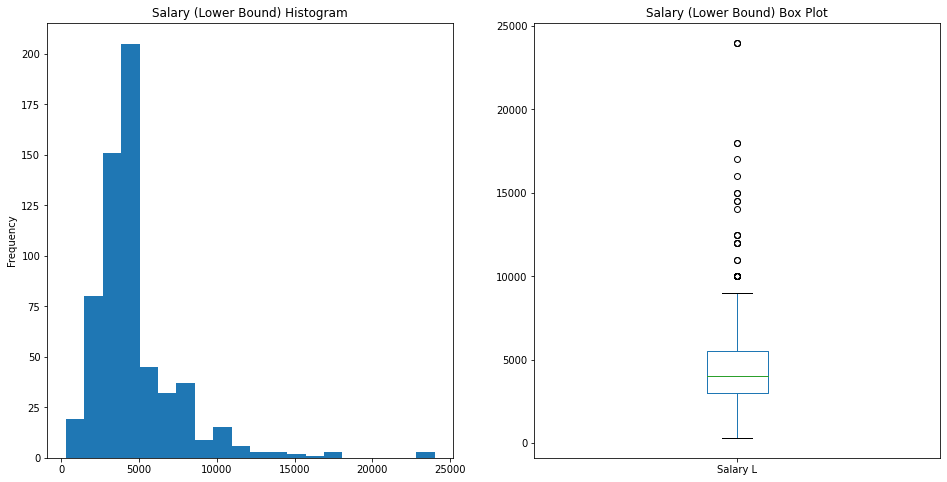

In [126]:
plot_distribution(df_dac['Salary L'], title="Salary (Lower Bound)")

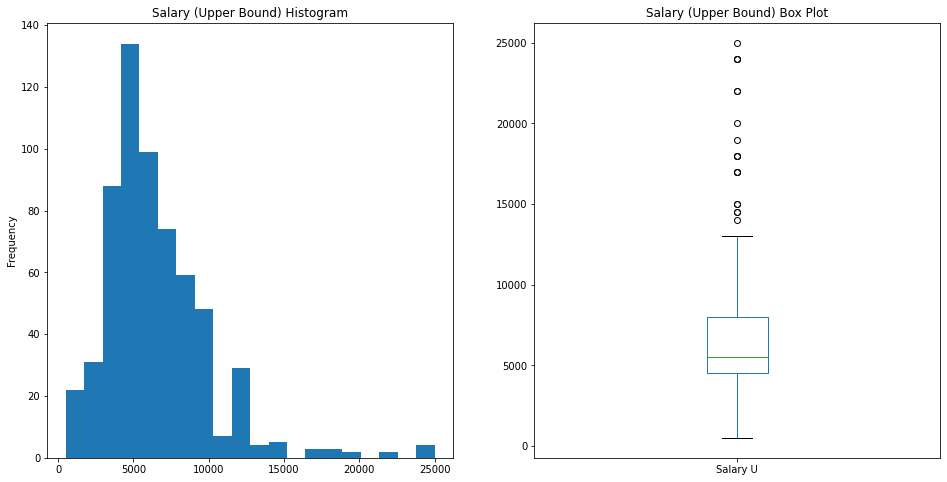

In [127]:
plot_distribution(df_dac['Salary U'], title="Salary (Upper Bound)")

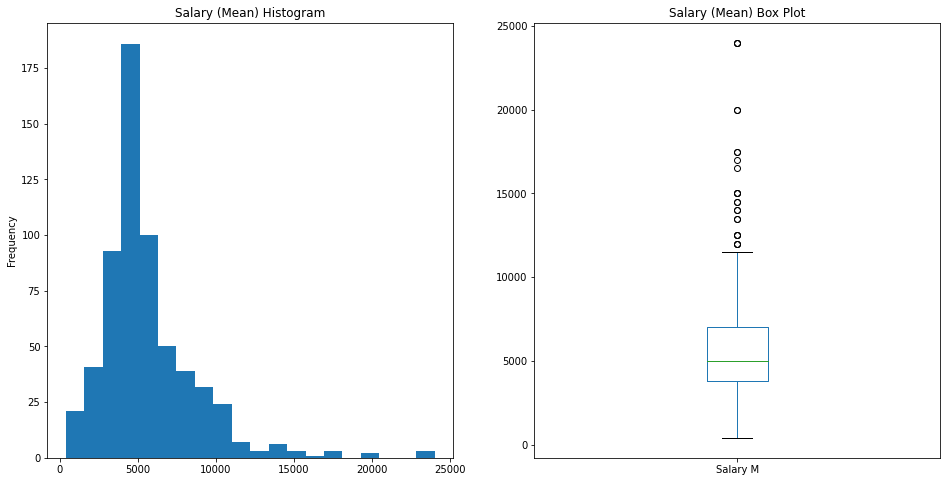

In [128]:
plot_distribution(df_dac['Salary M'], title="Salary (Mean)")

#### Without outliers

In [149]:
da_salary = remove_outliers(df_dac['Salary M'])
da_salary.describe()

count      590.000000
mean      5195.837684
std       2238.314010
min        400.000000
25%       3750.000000
50%       4750.000000
75%       6387.125000
max      11500.000000
Name: Salary M, dtype: float64

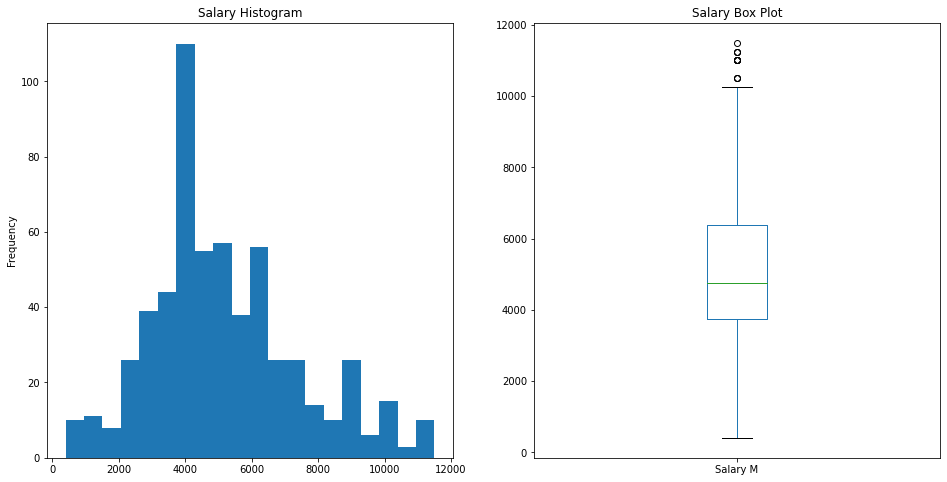

In [150]:
plot_distribution(da_salary, title="Salary")

### Data Engineer

In [139]:
df_dec.describe()

,Salary L,Salary U,Salary M
count,759.000000,759.000000,759.000000
mean,4458.405797,6469.807202,5464.106500
std,2781.914786,3772.478561,3182.886143
min,300.000000,300.000000,300.000000
25%,2500.000000,3500.000000,3050.000000
50%,4000.000000,6000.000000,4750.000000
75%,5250.000000,8000.000000,7000.000000
max,20000.000000,24000.000000,20000.000000


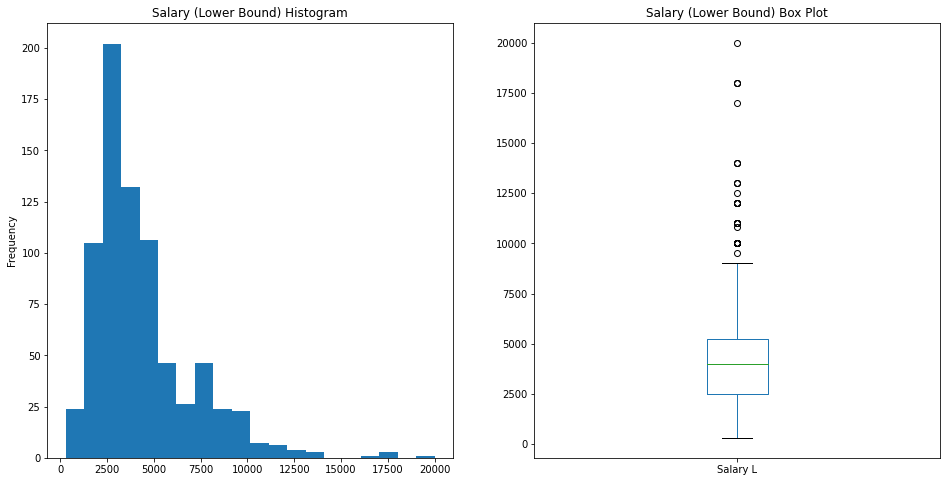

In [129]:
plot_distribution(df_dec['Salary L'], title="Salary (Lower Bound)")

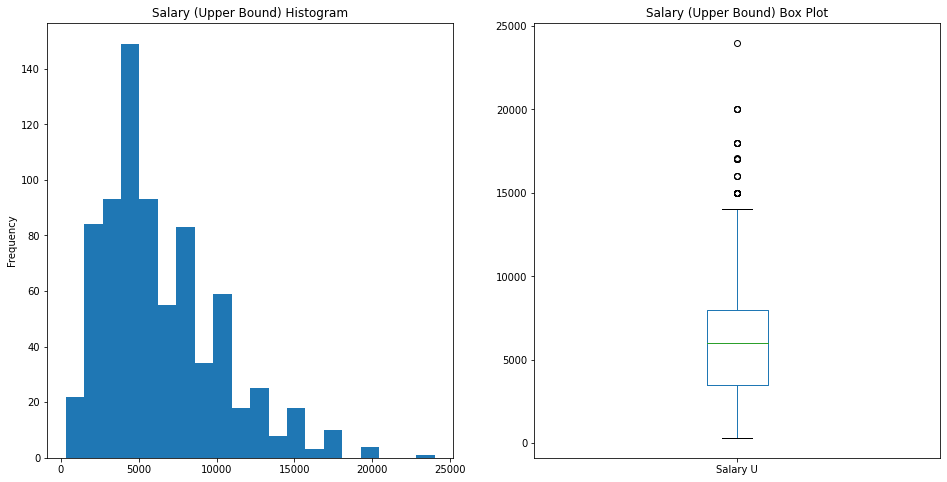

In [130]:
plot_distribution(df_dec['Salary U'], title="Salary (Upper Bound)")

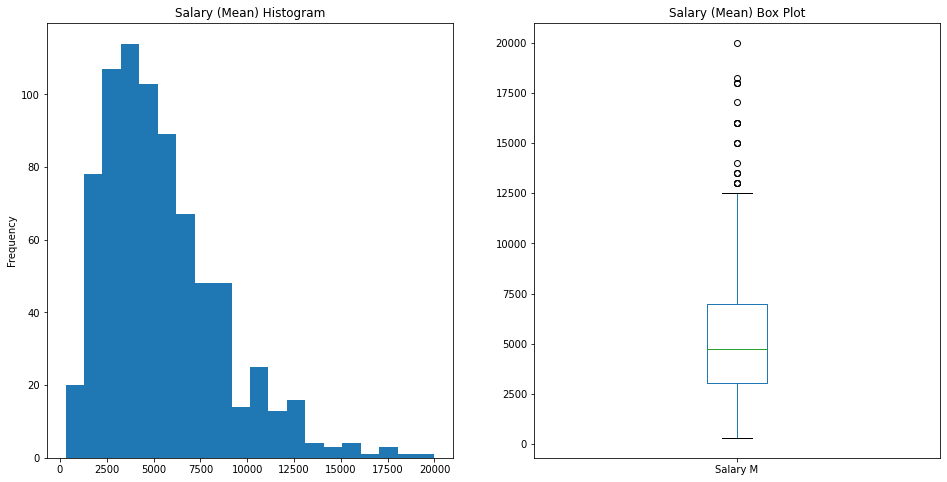

In [131]:
plot_distribution(df_dec['Salary M'], title="Salary (Mean)")

#### Without outliers

In [152]:
de_salary = remove_outliers(df_dec['Salary M'])
de_salary.describe()

count      738.000000
mean      5179.492096
std       2713.980404
min        300.000000
25%       3000.000000
50%       4654.250000
75%       6750.000000
max      12500.000000
Name: Salary M, dtype: float64

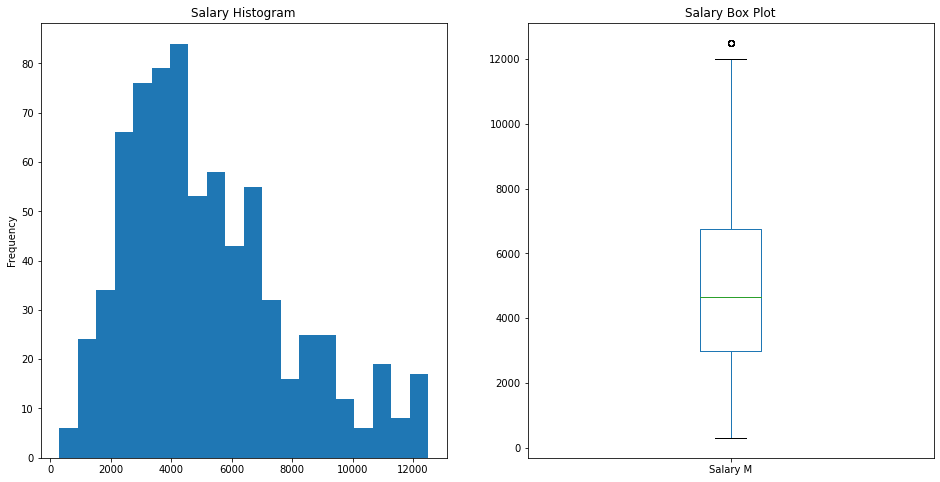

In [153]:
plot_distribution(de_salary, title="Salary")

### Data Scientist

In [140]:
df_dsc.describe()

,Salary L,Salary U,Salary M
count,72.000000,72.000000,72.000000
mean,6035.115741,8651.805556,7343.460648
std,4438.003823,5939.167117,5079.772501
min,500.000000,500.000000,500.000000
25%,3500.000000,4500.000000,4000.000000
50%,4000.000000,5500.000000,5050.000000
75%,8000.000000,10022.000000,9000.000000
max,20000.000000,30000.000000,25000.000000


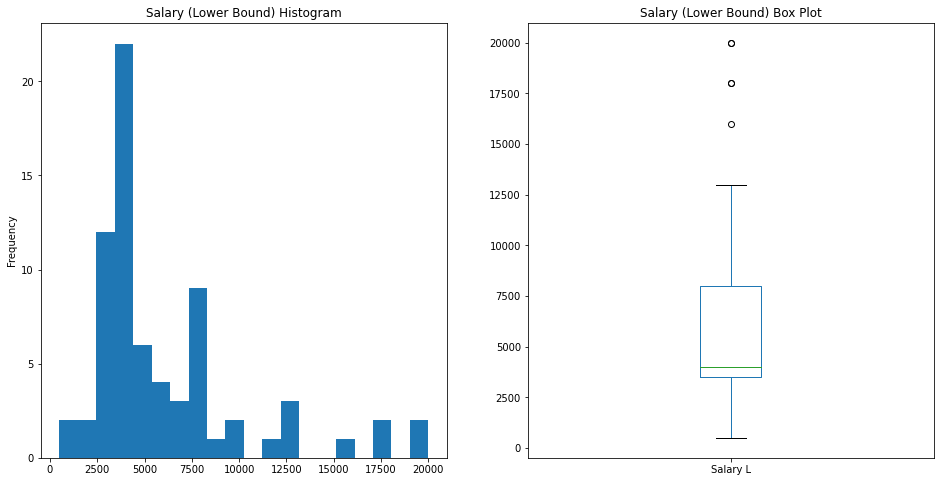

In [132]:
plot_distribution(df_dsc['Salary L'], title="Salary (Lower Bound)")

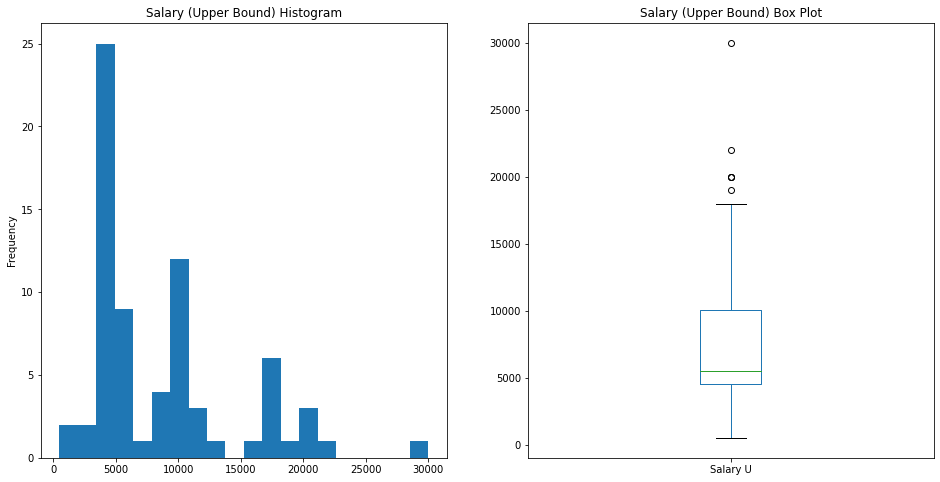

In [133]:
plot_distribution(df_dsc['Salary U'], title="Salary (Upper Bound)")

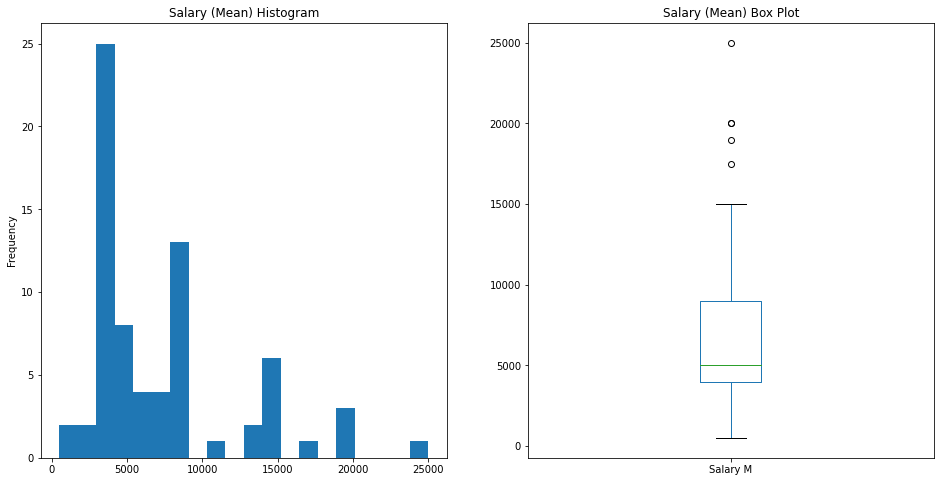

In [134]:
plot_distribution(df_dsc['Salary M'], title="Salary (Mean)")

#### Without outliers

In [154]:
ds_salary = remove_outliers(df_dsc['Salary M'])
ds_salary.describe()

count       67.000000
mean      6376.554726
std       3689.238982
min        500.000000
25%       4000.000000
50%       4500.000000
75%       8997.000000
max      15000.000000
Name: Salary M, dtype: float64

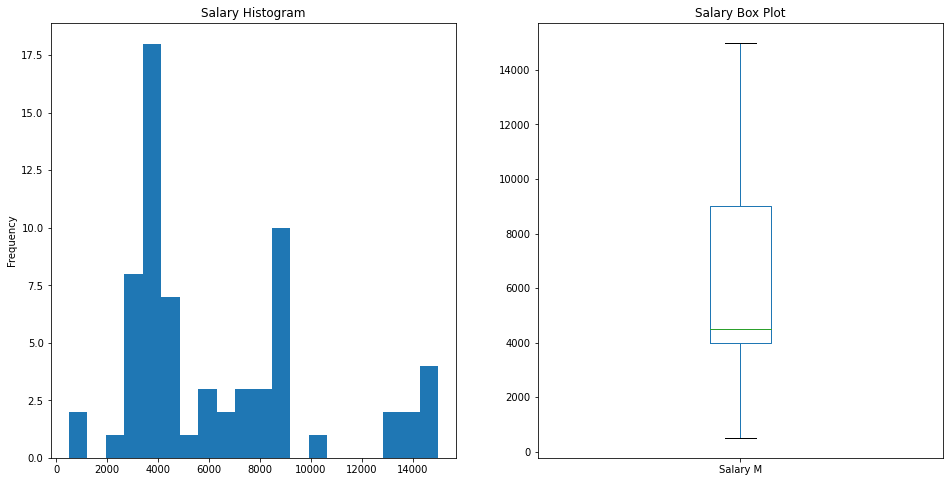

In [155]:
plot_distribution(ds_salary, title="Salary")

### Machine Learning Engineer

In [141]:
df_mlec.describe()

,Salary L,Salary U,Salary M
count,67.000000,67.000000,67.000000
mean,5360.656716,8040.716418,6700.686567
std,3305.367946,4705.378479,3935.638804
min,500.000000,500.000000,500.000000
25%,2550.000000,4750.000000,3875.000000
50%,4500.000000,7500.000000,6250.000000
75%,9000.000000,13000.000000,11000.000000
max,13000.000000,20000.000000,15000.000000


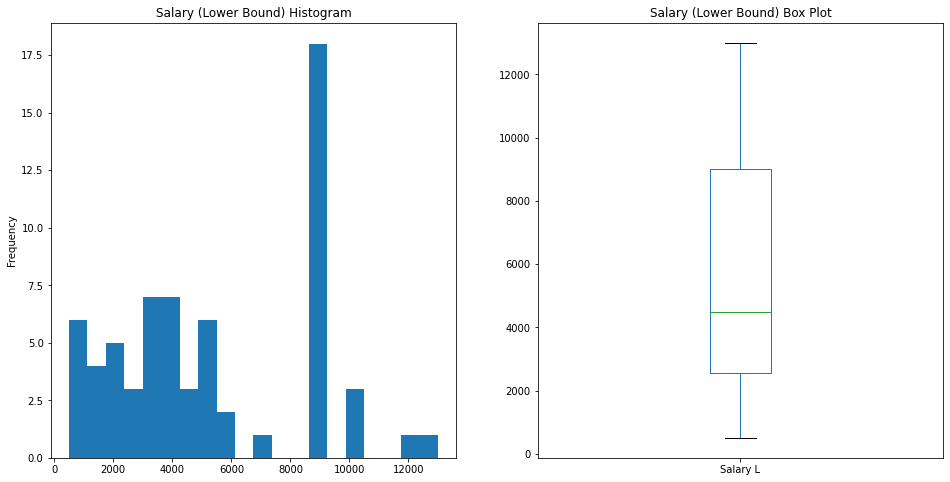

In [135]:
plot_distribution(df_mlec['Salary L'], title="Salary (Lower Bound)")

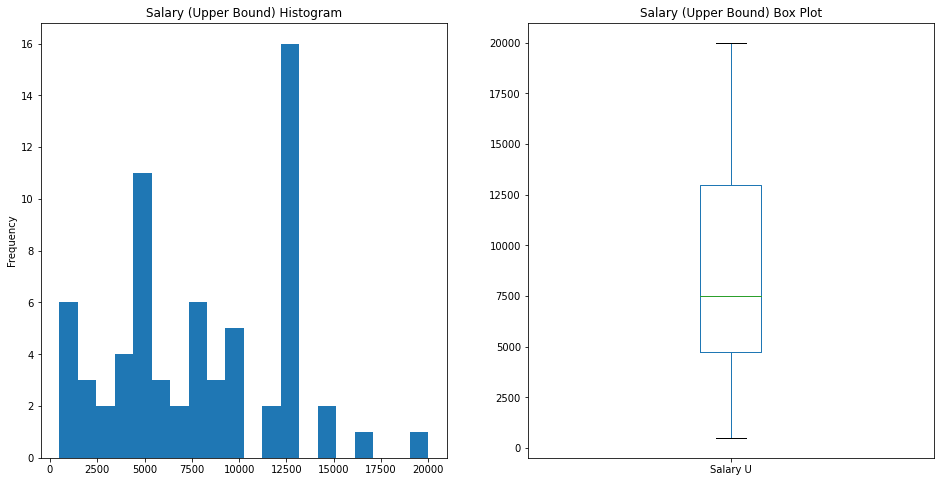

In [136]:
plot_distribution(df_mlec['Salary U'], title="Salary (Upper Bound)")

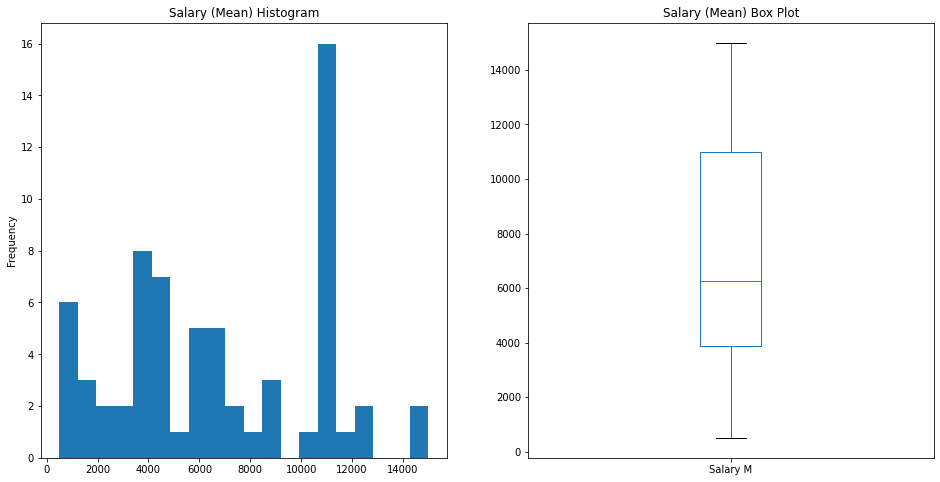

In [137]:
plot_distribution(df_mlec['Salary M'], title="Salary (Mean)")

#### Without outliers

In [158]:
mle_salary = remove_outliers(df_mlec['Salary M'])
mle_salary.describe()

count       67.000000
mean      6700.686567
std       3935.638804
min        500.000000
25%       3875.000000
50%       6250.000000
75%      11000.000000
max      15000.000000
Name: Salary M, dtype: float64

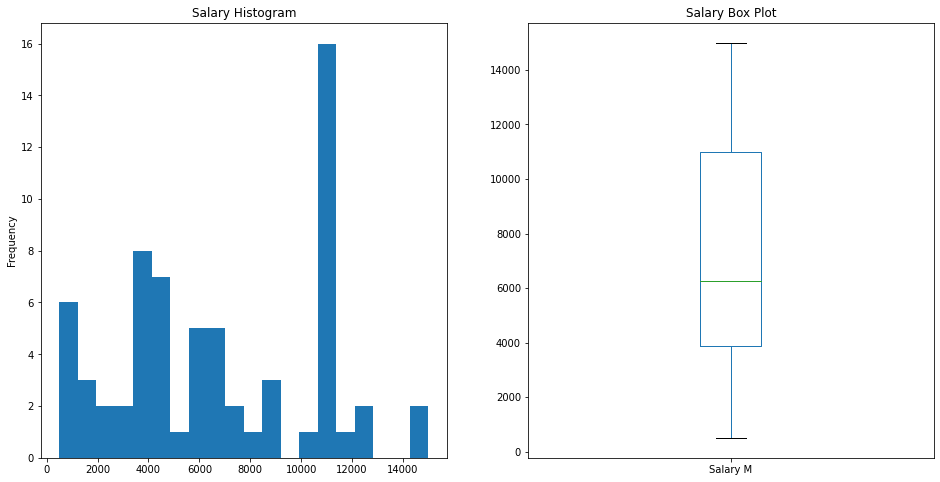

In [159]:
plot_distribution(mle_salary, title="Salary")

# Data Distribution By Title

## Data Analyst

In [173]:
def describe_and_plot(df, level, outliers=True):
    df_temp = df[(df['Levels'].str.contains(level, na=False)) |
                 (df['Level_from_Year'].str.contains(level, na=False))]
    if not outliers:
        df_temp['Salary L'] = remove_outliers(df_temp['Salary L'])
        df_temp['Salary U'] = remove_outliers(df_temp['Salary U'])
        df_temp['Salary M'] = remove_outliers(df_temp['Salary M'])
    print(df_temp.describe())
    print()
    plot_distribution(df_temp['Salary M'], title="Salary ({})".format(level))

### Junior

           Salary L      Salary U      Salary M
count    224.000000    224.000000    224.000000
mean    3390.055804   4579.500744   3984.778274
std     1319.429836   2065.009478   1644.891297
min      500.000000    500.000000    500.000000
25%     2775.000000   3500.000000   3137.500000
50%     3500.000000   4500.000000   4000.000000
75%     4000.000000   5000.000000   4500.000000
max    10000.000000  17000.000000  13500.000000



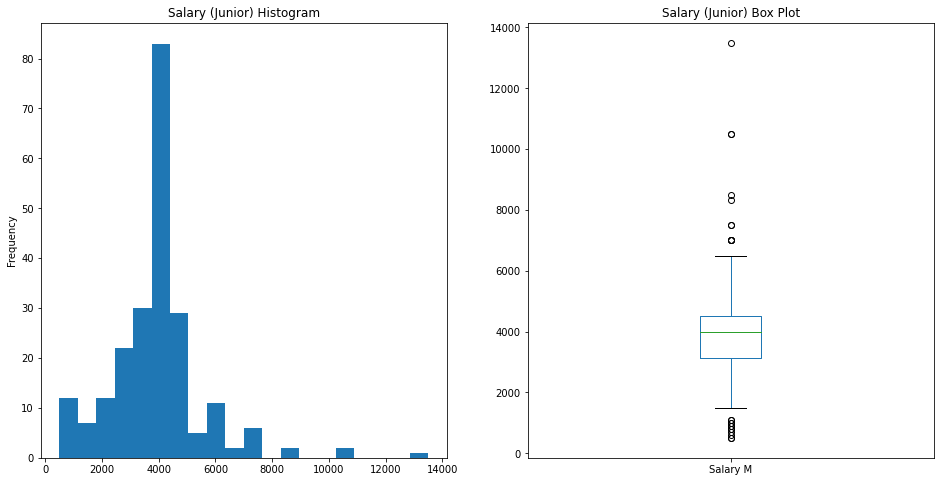

In [174]:
describe_and_plot(df_dac, "Junior")

          Salary L     Salary U     Salary M
count   210.000000   194.000000   201.000000
mean   3371.773810  4349.011168  3922.339967
std     991.360878  1089.672655  1015.533881
min    1000.000000  1500.000000  1500.000000
25%    2800.000000  3650.000000  3300.000000
50%    3500.000000  4500.000000  4000.000000
75%    4000.000000  5000.000000  4250.000000
max    5833.333333  7200.000000  6500.000000



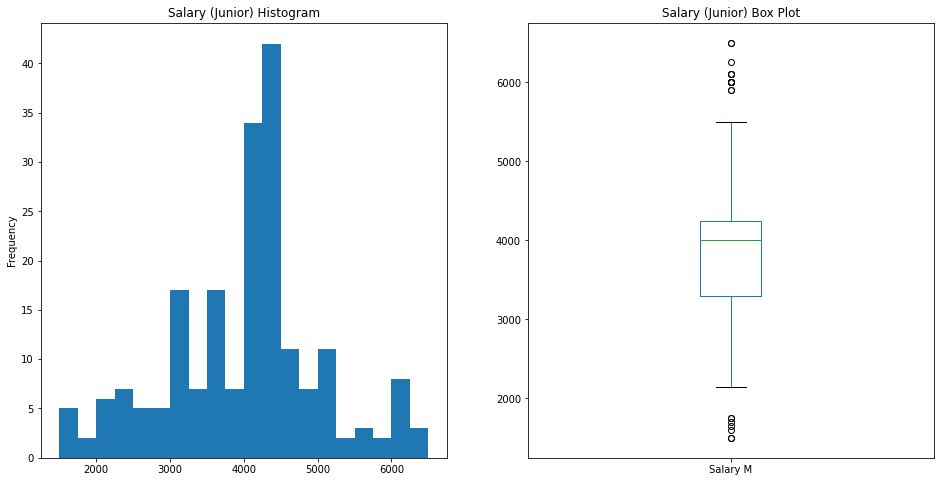

In [177]:
describe_and_plot(df_dac, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count    254.000000    254.000000    254.000000
mean    5492.557290   7453.171056   6472.864173
std     2903.896927   3273.292745   2978.801133
min      750.000000    791.666667    770.833333
25%     4000.000000   5500.000000   4750.000000
50%     4800.000000   7000.000000   5750.000000
75%     6875.000000   9000.000000   7500.000000
max    24000.000000  25000.000000  24000.000000



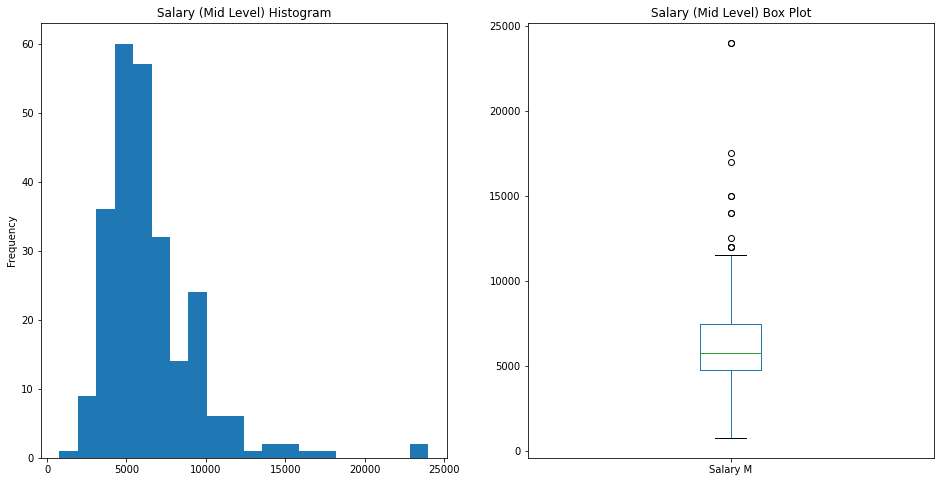

In [179]:
describe_and_plot(df_dac, "Mid Level")

           Salary L      Salary U      Salary M
count    244.000000    247.000000    242.000000
mean    5084.465376   7093.544325   6012.840909
std     1918.166370   2430.125761   1996.042190
min      750.000000    791.666667    770.833333
25%     3766.666667   5500.000000   4750.000000
50%     4600.000000   7000.000000   5750.000000
75%     6000.000000   8500.000000   7112.500000
max    11000.000000  14000.000000  11500.000000



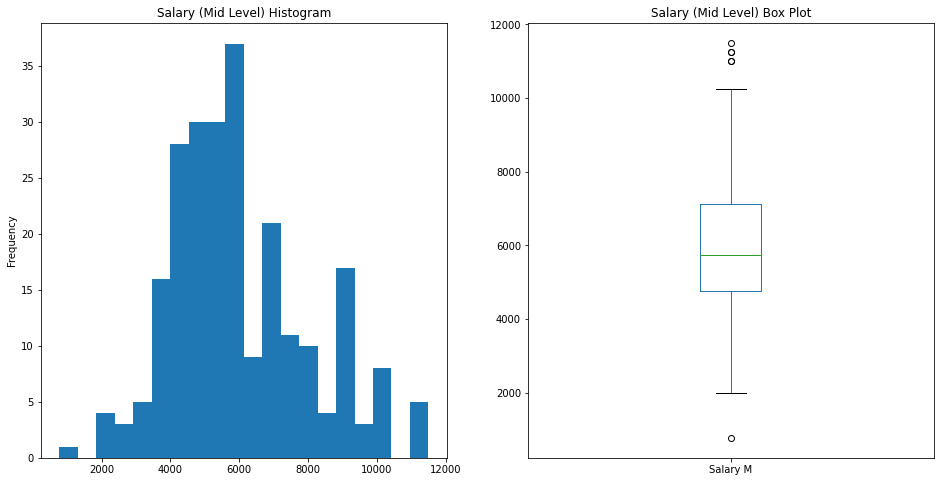

In [180]:
describe_and_plot(df_dac, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count    129.000000    129.000000    129.000000
mean    6670.482829   8926.451021   7798.466925
std     4277.330747   4704.556151   4375.859024
min      998.400000    998.400000    998.400000
25%     4500.000000   6000.000000   5250.000000
50%     5000.000000   8000.000000   6750.000000
75%     8000.000000  10000.000000   9000.000000
max    24000.000000  25000.000000  24000.000000



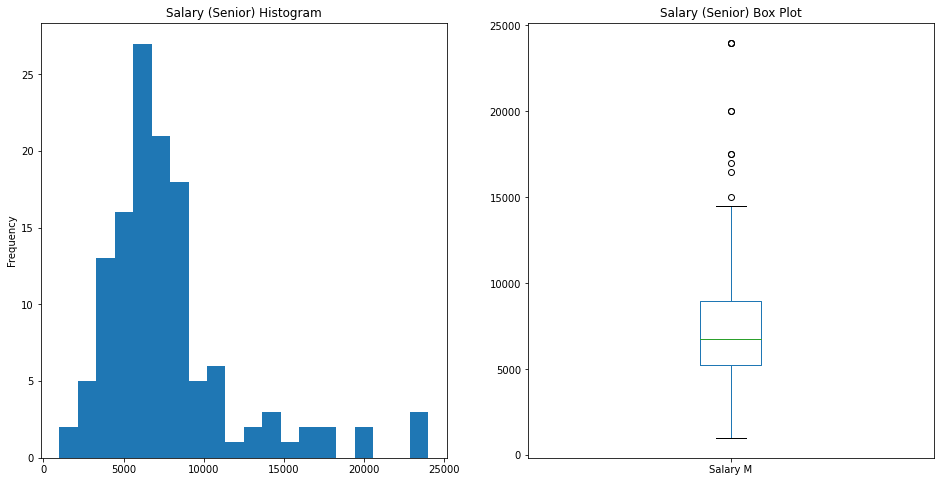

In [181]:
describe_and_plot(df_dac, "Senior")

           Salary L      Salary U      Salary M
count    119.000000    117.000000    119.000000
mean    5676.405756   7705.232322   6810.943137
std     2402.086278   2718.964221   2682.654139
min      998.400000    998.400000    998.400000
25%     4000.000000   5500.000000   5000.000000
50%     5000.000000   7500.000000   6000.000000
75%     7000.000000   9999.000000   8499.750000
max    12500.000000  14500.000000  14500.000000



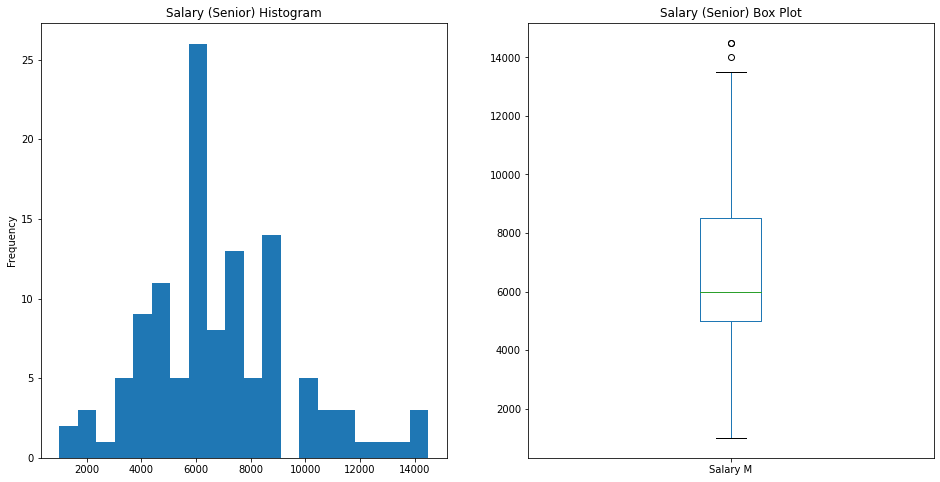

In [182]:
describe_and_plot(df_dac, "Senior", outliers=False)

## Data Engineer

### Junior

           Salary L      Salary U      Salary M
count    211.000000    211.000000    211.000000
mean    3262.616114   4634.540284   3948.578199
std     1985.185566   2844.692586   2325.806606
min      500.000000    500.000000    500.000000
25%     2029.500000   3000.000000   2500.000000
50%     2800.000000   4000.000000   3500.000000
75%     4000.000000   5050.500000   4500.000000
max    14000.000000  18000.000000  16000.000000



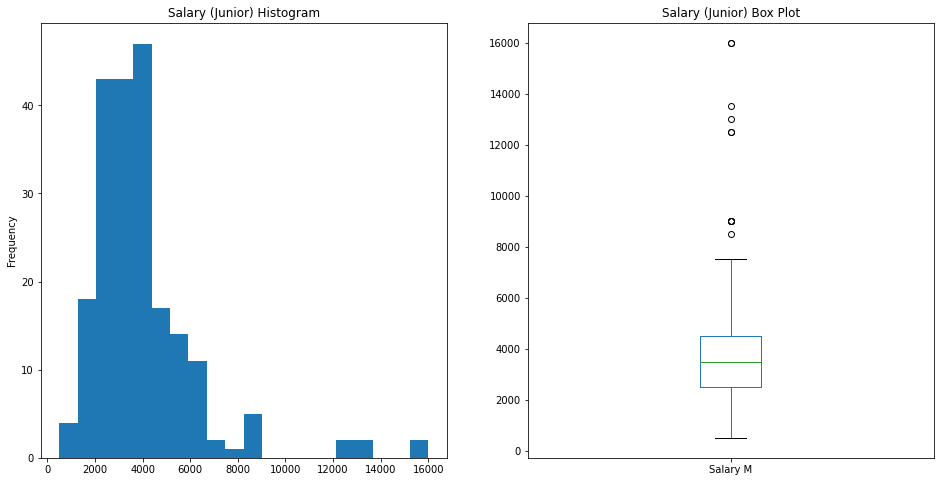

In [183]:
describe_and_plot(df_dec, "Junior")

          Salary L     Salary U     Salary M
count   202.000000   198.000000   200.000000
mean   2932.732673  4070.141414  3525.750000
std    1146.571831  1626.807696  1359.027792
min     500.000000   500.000000   500.000000
25%    2000.000000  2850.000000  2500.000000
50%    2800.000000  4000.000000  3500.000000
75%    4000.000000  5000.000000  4250.000000
max    6000.000000  8000.000000  7500.000000



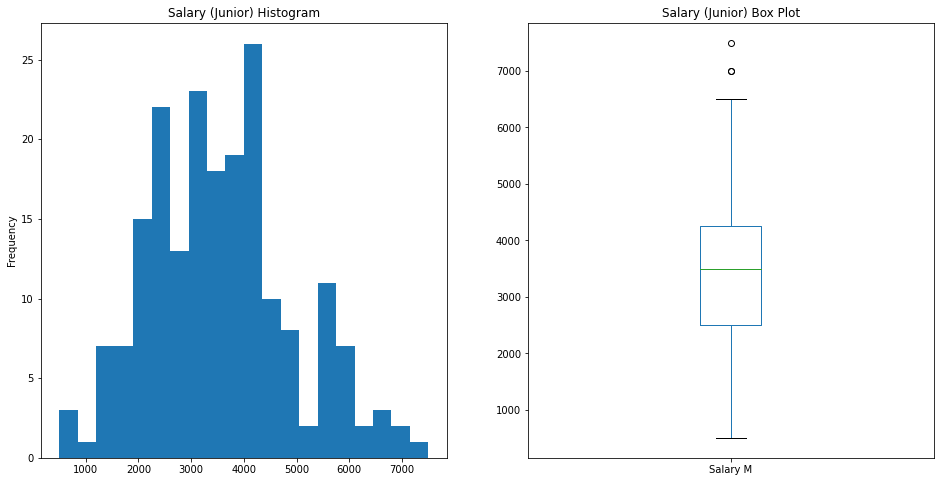

In [184]:
describe_and_plot(df_dec, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count    358.000000    358.000000    358.000000
mean    4885.531657   7102.667598   5994.099628
std     2692.463880   3465.821412   2966.138234
min      833.333333   1250.000000   1041.666667
25%     3000.000000   5000.000000   3900.000000
50%     4000.000000   6500.000000   5500.000000
75%     6000.000000   9000.000000   7500.000000
max    18000.000000  24000.000000  18250.000000



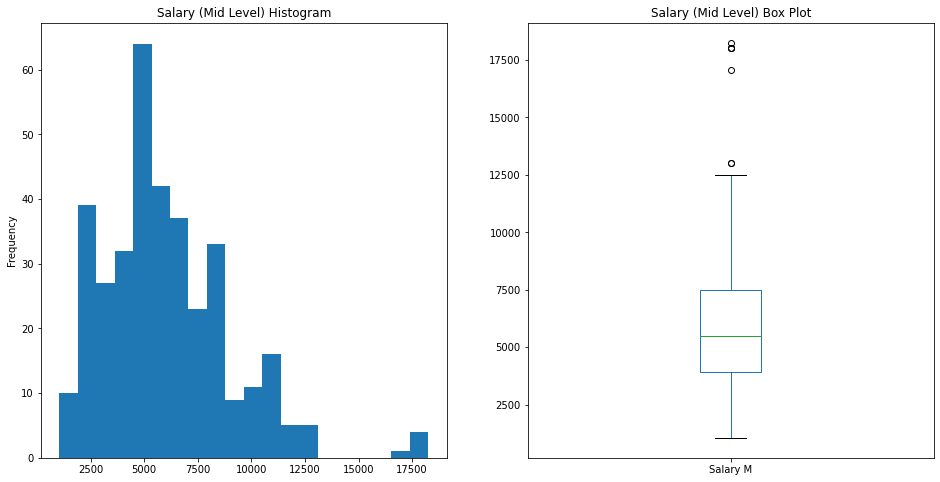

In [185]:
describe_and_plot(df_dec, "Mid Level")

           Salary L      Salary U      Salary M
count    348.000000    351.000000    351.000000
mean    4622.184866   6882.255461   5785.173789
std     2167.209131   3103.679152   2576.104614
min      833.333333   1250.000000   1041.666667
25%     3000.000000   5000.000000   3900.000000
50%     4000.000000   6500.000000   5500.000000
75%     6000.000000   9000.000000   7500.000000
max    10000.000000  15000.000000  12500.000000



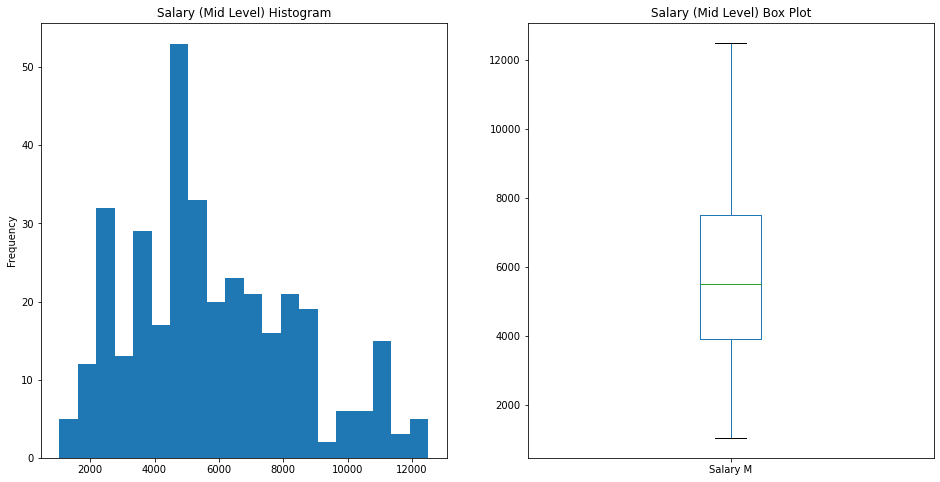

In [186]:
describe_and_plot(df_dec, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count    160.000000    160.000000    160.000000
mean    7128.480417   9949.122083   8538.801250
std     3273.327573   4068.134683   3561.890051
min      833.333333   1250.000000   1041.666667
25%     5000.000000   7950.000000   6500.000000
50%     7000.000000   9000.000000   8000.000000
75%     9000.000000  13000.000000  11000.000000
max    20000.000000  20000.000000  20000.000000



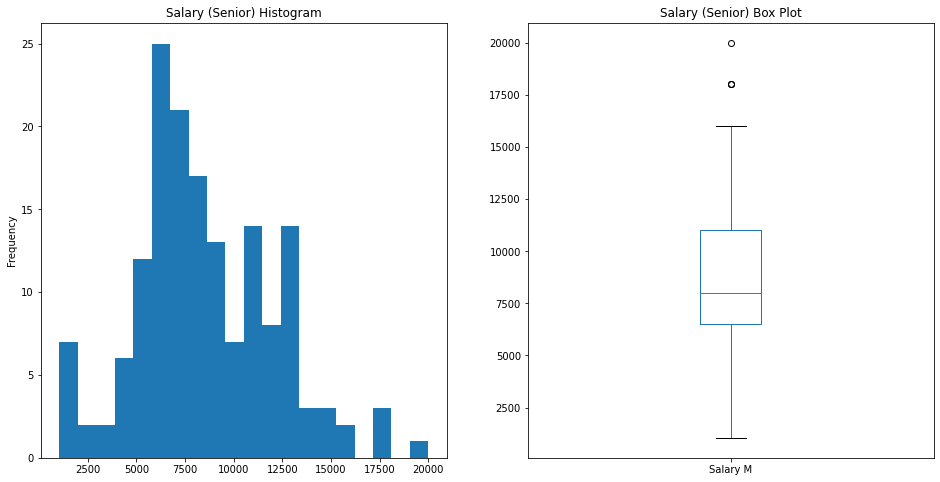

In [187]:
describe_and_plot(df_dec, "Senior")

           Salary L      Salary U      Salary M
count    156.000000    160.000000    156.000000
mean    6836.902991   9949.122083   8283.385897
std     2747.579024   4068.134683   3220.061873
min      833.333333   1250.000000   1041.666667
25%     5000.000000   7950.000000   6500.000000
50%     7000.000000   9000.000000   8000.000000
75%     9000.000000  13000.000000  11000.000000
max    14000.000000  20000.000000  16000.000000



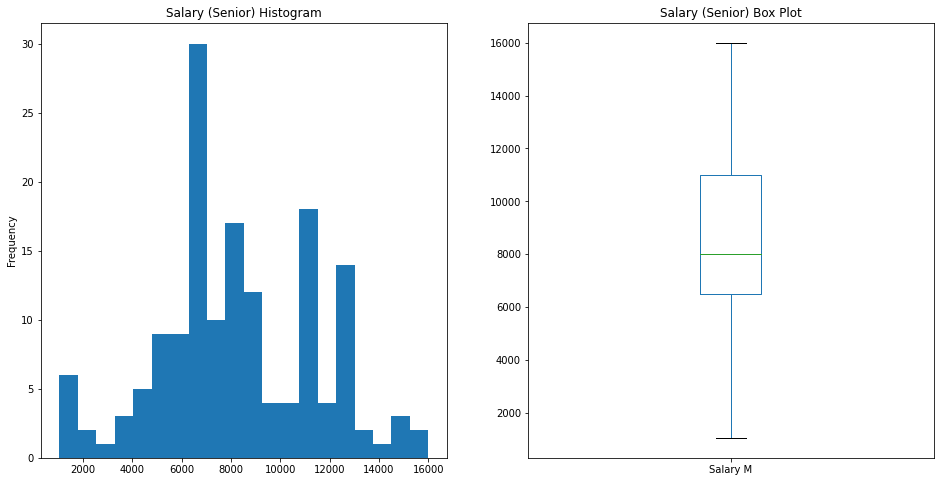

In [188]:
describe_and_plot(df_dec, "Senior", outliers=False)

## Data Scientist

### Junior

          Salary L     Salary U      Salary M
count    25.000000     25.00000     25.000000
mean   3804.000000   5120.00000   4462.000000
std    1618.507543   2484.45165   1977.176016
min     500.000000    500.00000    500.000000
25%    3500.000000   4500.00000   4000.000000
50%    3500.000000   4500.00000   4000.000000
75%    4000.000000   5000.00000   4500.000000
max    9000.000000  13000.00000  10500.000000



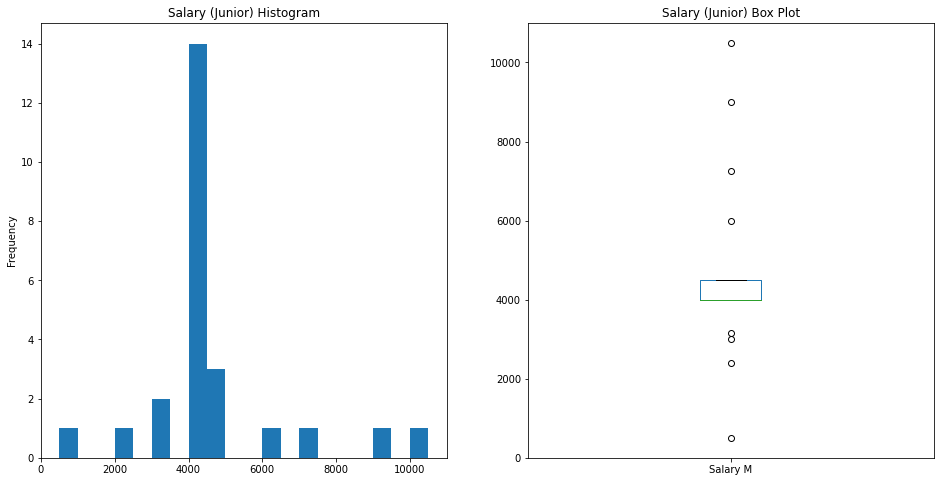

In [189]:
describe_and_plot(df_dsc, "Junior")

          Salary L     Salary U     Salary M
count    20.000000    17.000000    17.000000
mean   3640.000000  4588.235294  4102.941176
std     387.162417   196.476312   198.801556
min    2800.000000  4500.000000  4000.000000
25%    3500.000000  4500.000000  4000.000000
50%    3500.000000  4500.000000  4000.000000
75%    3625.000000  4500.000000  4000.000000
max    4500.000000  5000.000000  4500.000000



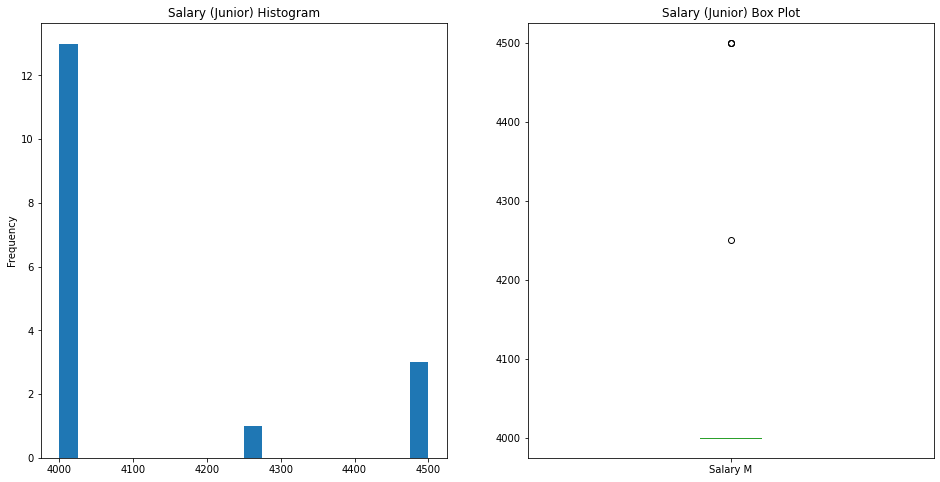

In [190]:
describe_and_plot(df_dsc, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count     21.000000     21.000000     21.000000
mean    6245.285714   9411.238095   7828.261905
std     4013.730424   6188.535545   5028.964420
min     2500.000000   3500.000000   3000.000000
25%     3499.000000   5000.000000   4500.000000
50%     6000.000000   9800.000000   8000.000000
75%     8000.000000  10000.000000   9000.000000
max    20000.000000  30000.000000  25000.000000



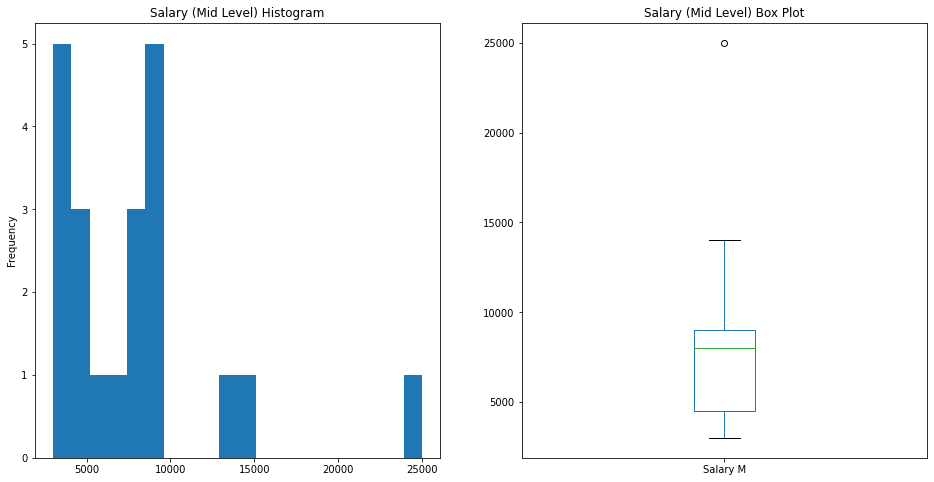

In [191]:
describe_and_plot(df_dsc, "Mid Level")

           Salary L      Salary U      Salary M
count     20.000000     19.000000     20.000000
mean    5557.550000   7875.578947   6969.675000
std     2550.014086   3523.640515   3213.439247
min     2500.000000   3500.000000   3000.000000
25%     3374.250000   4750.000000   4374.875000
50%     5250.000000   9000.000000   7372.000000
75%     8000.000000  10000.000000   9000.000000
max    10000.000000  16000.000000  14000.000000



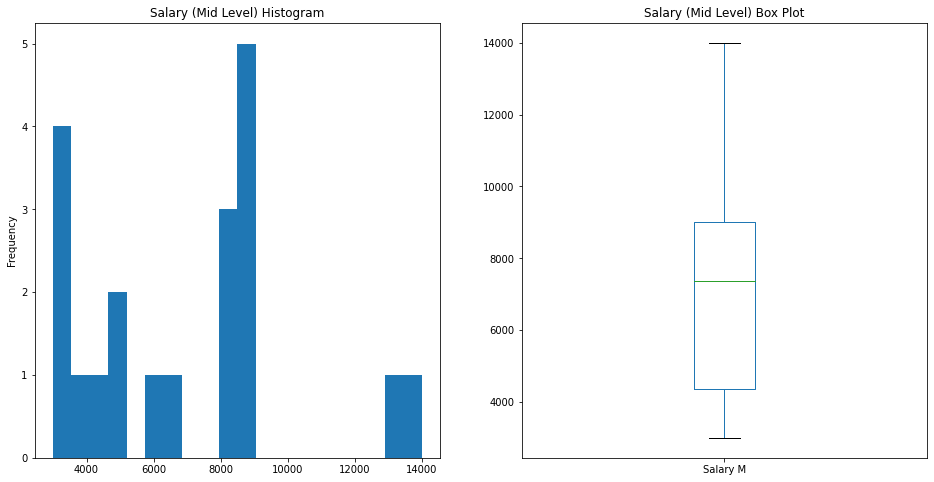

In [192]:
describe_and_plot(df_dsc, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count     12.000000     12.000000     12.000000
mean   13016.666667  17625.000000  15320.833333
std     5663.573131   6732.300026   5932.478339
min     3000.000000   5000.000000   4000.000000
25%     9500.000000  17000.000000  14000.000000
50%    13000.000000  18500.000000  15000.000000
75%    18000.000000  20000.000000  19250.000000
max    20000.000000  30000.000000  25000.000000



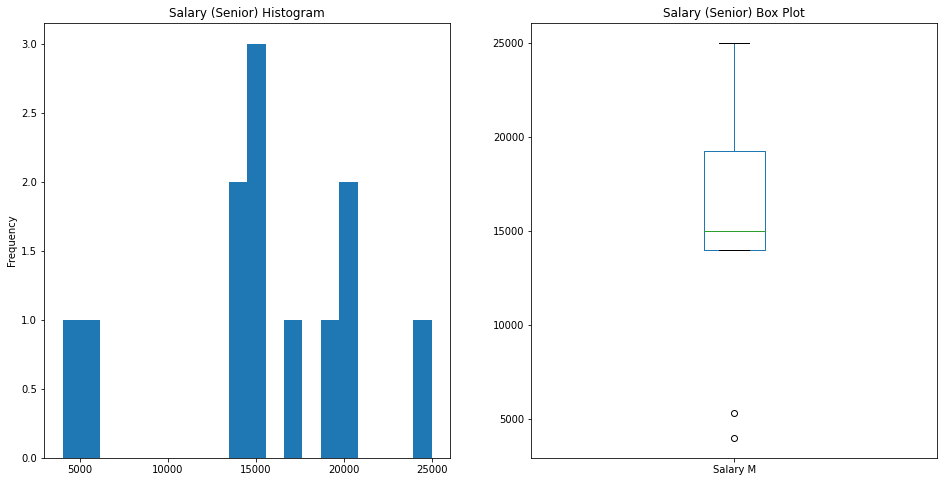

In [193]:
describe_and_plot(df_dsc, "Senior")

           Salary L      Salary U     Salary M
count     12.000000      9.000000     10.00000
mean   13016.666667  19000.000000  17450.00000
std     5663.573131   1658.312395   3562.53655
min     3000.000000  17000.000000  14000.00000
25%     9500.000000  18000.000000  15000.00000
50%    13000.000000  19000.000000  16250.00000
75%    18000.000000  20000.000000  19750.00000
max    20000.000000  22000.000000  25000.00000



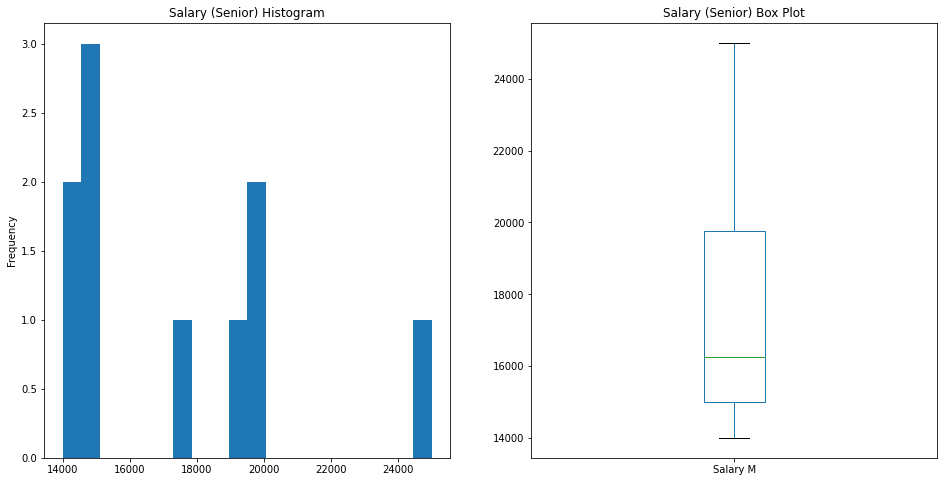

In [194]:
describe_and_plot(df_dsc, "Senior", outliers=False)

## Machine Learning Engineer

### Junior

           Salary L      Salary U      Salary M
count     20.000000     20.000000     20.000000
mean    3635.000000   5575.000000   4605.000000
std     2817.851925   3897.755765   3309.352775
min      700.000000    700.000000    700.000000
25%     2000.000000   3750.000000   2912.500000
50%     3000.000000   5000.000000   4000.000000
75%     3700.000000   6375.000000   4700.000000
max    10000.000000  15000.000000  12500.000000



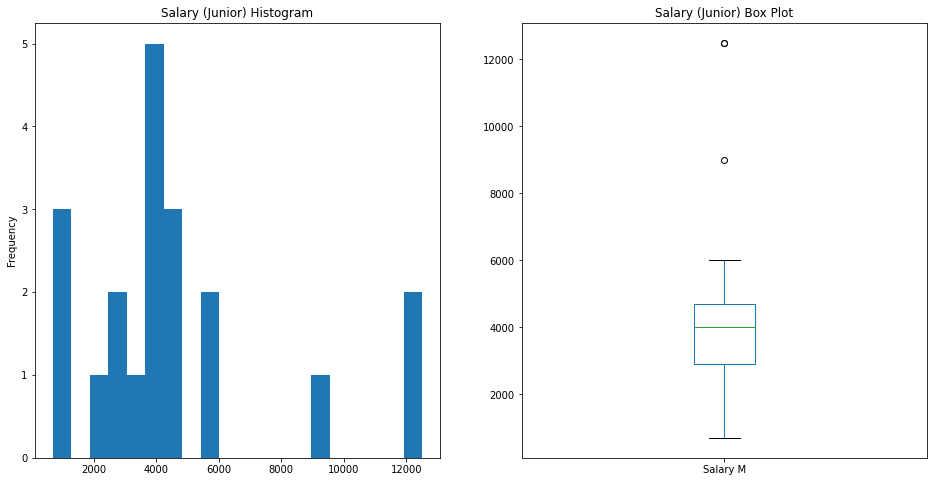

In [197]:
describe_and_plot(df_mlec, "Junior")

          Salary L     Salary U     Salary M
count    17.000000    18.000000    17.000000
mean   2570.588235  4527.777778  3417.647059
std    1167.135760  2316.895884  1583.897603
min     700.000000   700.000000   700.000000
25%    2000.000000  3250.000000  2650.000000
50%    2600.000000  5000.000000  4000.000000
75%    3500.000000  5625.000000  4250.000000
max    4500.000000  9000.000000  6000.000000



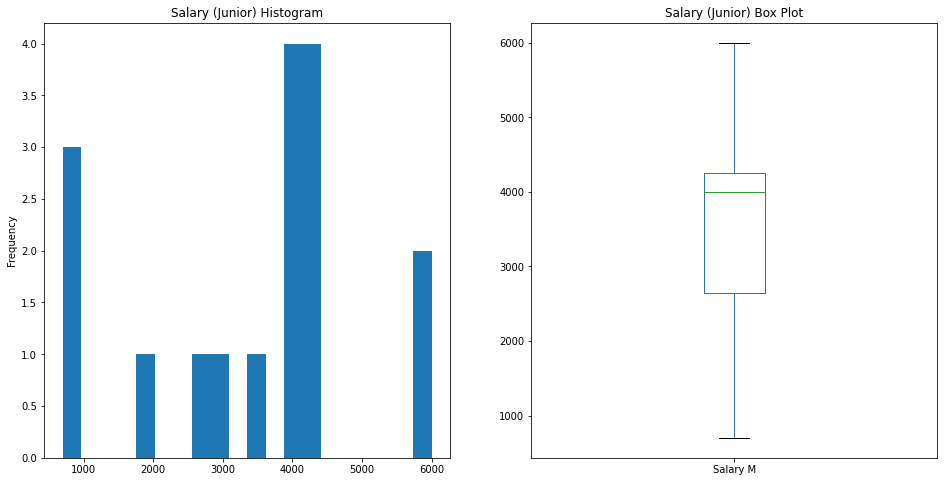

In [198]:
describe_and_plot(df_mlec, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count     31.000000     31.000000     31.000000
mean    6645.161290   9896.774194   8270.967742
std     3184.319782   4936.698213   3985.677989
min      700.000000    700.000000    700.000000
25%     4750.000000   7000.000000   5875.000000
50%     9000.000000  13000.000000  11000.000000
75%     9000.000000  13000.000000  11000.000000
max    10000.000000  20000.000000  14600.000000



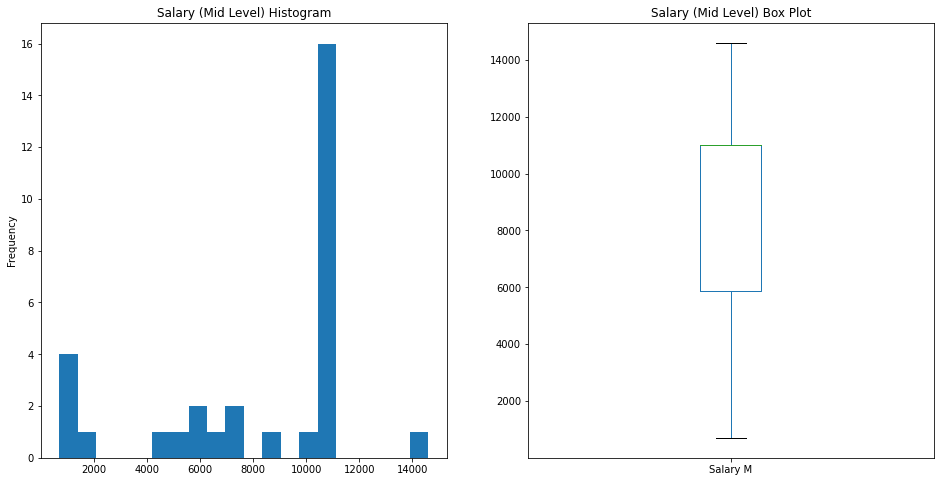

In [199]:
describe_and_plot(df_mlec, "Mid Level")

           Salary L      Salary U      Salary M
count     31.000000     31.000000     31.000000
mean    6645.161290   9896.774194   8270.967742
std     3184.319782   4936.698213   3985.677989
min      700.000000    700.000000    700.000000
25%     4750.000000   7000.000000   5875.000000
50%     9000.000000  13000.000000  11000.000000
75%     9000.000000  13000.000000  11000.000000
max    10000.000000  20000.000000  14600.000000



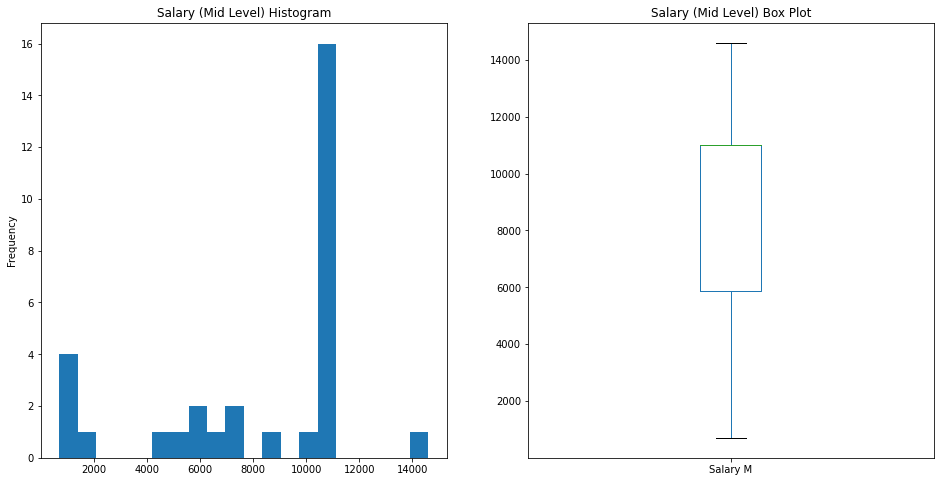

In [200]:
describe_and_plot(df_mlec, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count     23.000000     23.000000     23.000000
mean    8369.565217  12043.478261  10206.521739
std     2403.678012   3052.245982   2682.701503
min     3000.000000   5000.000000   4000.000000
25%     9000.000000  13000.000000  11000.000000
50%     9000.000000  13000.000000  11000.000000
75%     9000.000000  13000.000000  11000.000000
max    13000.000000  17000.000000  15000.000000



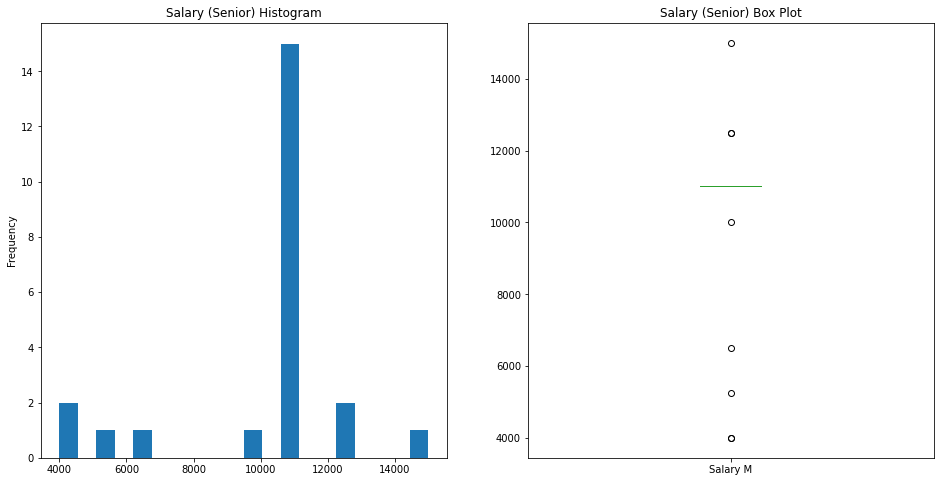

In [201]:
describe_and_plot(df_mlec, "Senior")

       Salary L  Salary U  Salary M
count      15.0      15.0      15.0
mean     9000.0   13000.0   11000.0
std         0.0       0.0       0.0
min      9000.0   13000.0   11000.0
25%      9000.0   13000.0   11000.0
50%      9000.0   13000.0   11000.0
75%      9000.0   13000.0   11000.0
max      9000.0   13000.0   11000.0



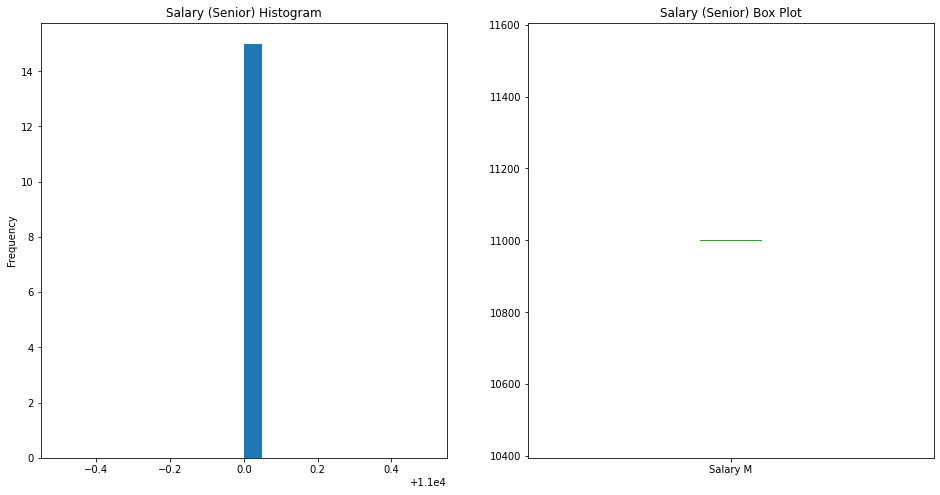

In [202]:
describe_and_plot(df_mlec, "Senior", outliers=False)